              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
 Sleep Apnea       0.85      0.69      0.76        16
         nan       0.95      0.98      0.97        43

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



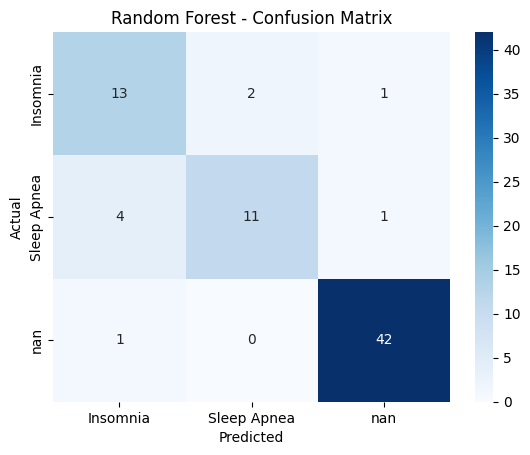

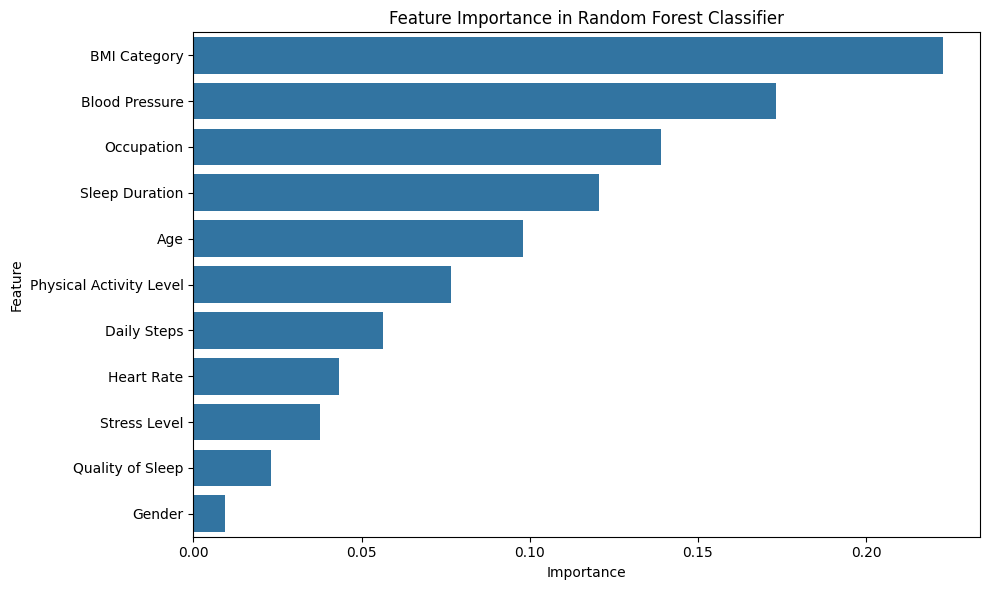

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])

label_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

class_labels = [str(label) for label in label_encoders['Sleep Disorder'].classes_]
print(classification_report(y_test, y_pred, target_names=class_labels))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Sleep Disorder'].classes_,
            yticklabels=label_encoders['Sleep Disorder'].classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Feature Importance in Random Forest Classifier")
plt.tight_layout()
plt.show()


📋 Dataset Columns: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

🔍 Anomaly Label Distribution:
Anomaly Label
Normal     337
Anomaly     37
Name: count, dtype: int64


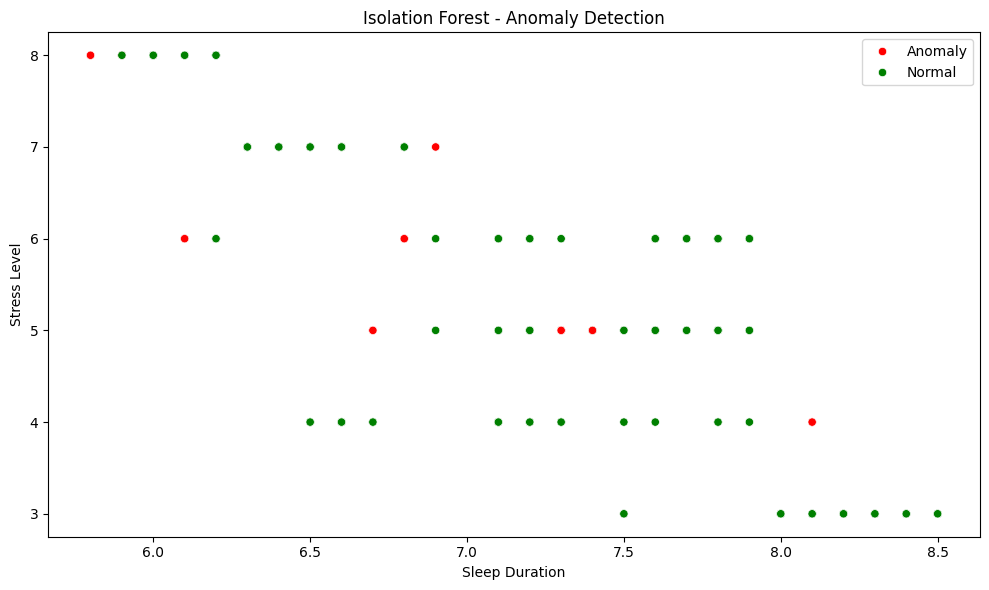

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

if 'Person ID' in df.columns:
    df = df.drop(columns=['Person ID'])

print("📋 Dataset Columns:", df.columns.tolist())

label_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df)

df['Anomaly Label'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("\n🔍 Anomaly Label Distribution:")
print(df['Anomaly Label'].value_counts())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Stress Level', hue='Anomaly Label', palette={'Normal': 'green', 'Anomaly': 'red'})
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.legend()
plt.tight_layout()
plt.show()
